In [1]:
import matplotlib
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
from matplotlib import colors
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 1.0}
figure = {'figsize' : [10.0, 10/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)

import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os #com
import glob2 as glob
from scipy.optimize import curve_fit # pacote para ajuste de curvas
from scipy.signal import find_peaks
from scipy import signal
from scipy.optimize import curve_fit as fit
from skimage import io
%matplotlib inline

/home/paulotk/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
#"_m" in the end means "measured"
#"_t" in the end means "theoretical"
#"_f" in the end means "fit"
positions_m = []

In [4]:
d_plates = 7.6e-3
rho_oil = 886
g = 9.81
n_air = 1.88810e-5
b = 8.2e-3
press = 10210
vf = 0.03111e-3 #0.0523e-3#0.0917e-3#0.1614e-3
#0.1301e-3#0.1514e-3#0.0379e-3#0.0571e-3#0.0549e-3#0.0581e-3#0.0905e-3#0.0464e-3

vf_list0 = [0.046466602129719, 0.090493136756482, 0.058134083450539,
0.054933875890132, 0.057115198451113, 0.037884203002144, 0.151370160939539,
0.130056546324489, 0.161350844277674, 0.091652240815542, 
0.052300657330666]
err_vf_list0 = [0.033881897386254,0.0355871886121,0.032817627754337,
               0.03560528992879,0.033881897386254,0.050035739814153,
               0.030448020878643,0.030448020878643,0.043777360850532,
               0.006732063858434,0.006668571972945]
vr = 0.19164e-3 #0.1505e-3#0.2688e-3#0.3750e-3
#0.1402e-3#0.3290e-3#0.2862e-3#0.2163e-3#0.3179e-3#0.2597e-3#0.3801e-3#0.168833e-3
vr_list0 = [0.168833766753351, 0.3800629590766, 0.259732360097324,
           0.317923763179238, 0.216342254663423, 0.286168521462639, 0.328957239309827,
           0.140158355327129, 0.375041213320145, 0.268776648081338, 0.150539447066757]

err_vr_list0 =[0.014002800560112, 0.014690451206716, 0.01419302514193,
              0.01419302514193, 0.01419302514193, 0.013910969793323, 0.008752188047012, 
              0.009723572718433,0.01153972964062, 0.011479173499508, 0.0118004045853]
vf_list = []
err_vf_list = []
vr_list = []
err_vr_list = []
for i in range(11):
    vf_list.append(vf_list0[i]*1e-3)
    err_vf_list.append(err_vf_list0[i]*1e-3)
    vr_list.append(vr_list0[i]*1e-3)
    err_vr_list.append(err_vr_list0[i]*1e-3)
V = 504

In [6]:
a = np.sqrt((b/(2*press))**2+9*n_air*vf/(2*rho_oil*g))-b/(2*press)
a_list = []
for i in range(len(vf_list)):
    a_list.append(np.sqrt((b/(2*press))**2+9*n_air*vf_list[i]/(2*rho_oil*g))-b/(2*press))

q_list = []
deltaq_list = []
for i in range(len(vf_list)):
    q_list.append( (4*np.pi/3)*(a_list[i]**3)*rho_oil*g*d_plates*(vf_list[i]+vr_list[i])/(V*vf_list[i]) )

for i in range(len(vf_list)):
    deltaq_list.append( q_list[i]*np.sqrt( (err_vf_list[i]/vf_list[i])**2+ (err_vr_list[i]/vr_list[i])**2 ) )

q=(4*np.pi/3)*(a**3)*rho_oil*g*d_plates*(vf+vr)/(V*vf)
print("raios =", a_list)
print("carga =", q)
for i in range(len(vf_list)):
    print("carga =", q_list[i], "+/-", deltaq_list[i])

raios = [3.829620680227039e-07, 6.211074540766872e-07, 4.5256425786844685e-07, 4.3405066544870943e-07, 4.467137276014144e-07, 3.2753480221356313e-07, 8.794328369252938e-07, 7.953504467612555e-07, 9.169646837493681e-07, 6.266322754711845e-07, 4.185037937407539e-07]
carga = 8.685865909285543e-20
carga = 1.4287147604562034e-19 +/- 1.0484885915290098e-19
carga = 6.840224881578618e-19 +/- 2.702938208483641e-19
carga = 2.7824604676198053e-19 +/- 1.5780856822124718e-19
carga = 3.04718257964101e-19 +/- 1.97970507944685e-19
carga = 2.343151474789015e-19 +/- 1.3984793323594815e-19
carga = 1.6500772425364565e-19 +/- 2.1808229271275654e-19
carga = 1.1848940432537665e-18 +/- 2.4041661526362238e-19
carga = 5.7388789064941795e-19 +/- 1.401299879324145e-19
carga = 1.407159474349342e-18 +/- 3.8423470566563264e-19
carga = 5.312380573516036e-19 +/- 4.513738781007445e-20
carga = 1.5606994245584942e-19 +/- 2.3359455384945305e-20


In [5]:
charges_measured = [1.4256723978792294e-19, 
                    2.7799131371430147e-19, 
                    6.841428093179571e-19, 
                    3.0444177897829467e-19, 
                    2.3419048305283005e-19,
                    1.6512305854173612e-19,
                    1.1852997823112112e-18,
                    5.742610450630125e-19,
                    1.4075904881005605e-18,
                    5.3164349995342675e-19,
                    1.5603666413383012e-19]
n_measured = [1, 2, 4, 2, 1, 1, 7, 4, 9, 3, 1]
n_measured2 = [1, 2, 5, 2, 2, 1, 8, 4, 10, 4, 1]

for i in range(len(charges_measured)):
    print(charges_measured[i]/1.419e-19)
    #n_measured2.append(round(charges_measured[i]/1.419))
    

    

data = {'Charges':charges_measured,
        'n':n_measured2}
 
# Create DataFrame
df = pd.DataFrame(data)
df.head()

1.0047021831425154
1.9590649310380654
4.8213023912470545
2.1454670822994695
1.6503910010770264
1.1636579178416921
8.35306400501206
4.046941825673097
9.919594701201977
3.746606764999484
1.0996241306119108


,Charges,n
0,1.425672e-19,1
1,2.779913e-19,2
2,6.841428e-19,5
3,3.044418e-19,2
4,2.341905e-19,2


1.419000000000014e-19


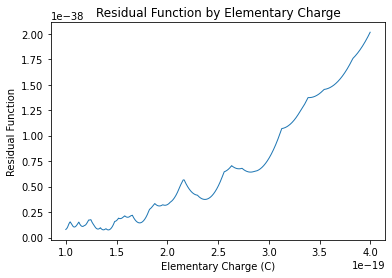

In [22]:
res = lambda elem: np.average(np.array([min([(charge-n*elem)**2 for n in np.arange(15)]) for charge in charges_measured]))

xrange = np.arange(1e-19, 4e-19, 0.001e-19)
vals = [res(x) for x in xrange]
elem=min(xrange[np.where(vals==min(vals))])
print(elem)
f, ax = plt.subplots()
ax.plot(xrange, [res(x) for x in xrange])
ax.set_ylabel('Residual Function')
ax.set_xlabel('Elementary Charge (C)')
ax.set_title('Residual Function by Elementary Charge')
plt.show()

In [8]:
from lmfit import Model, Parameters

def fir_order(number_e, c0, e):
    return c0 + e*number_e

mod = Model(fir_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['c0', 'e']
independent variables: ['number_e']


In [9]:
params = mod.make_params(c0=0, e=1e-19)
result = mod.fit(df['Charges'], params, number_e=df['n'])

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
c0 = dic_result['c0']
el = dic_result['e']

[[Model]]
    Model(fir_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 11
    # variables        = 2
    chi-square         = 8.2298e-39
    reduced chi-square = 9.1442e-40
    Akaike info crit   = -987.000475
    Bayesian info crit = -986.204685
[[Variables]]
    c0: -3.4622e-21 +/- 1.4720e-20 (425.15%) (init = 0)
    e:   1.4253e-19 +/- 3.1779e-21 (2.23%) (init = 1e-19)
[[Correlations]] (unreported correlations are < 0.250)
    C(c0, e) = -0.785
OrderedDict([('c0', -3.4622216333408e-21), ('e', 1.4253431502304583e-19)])


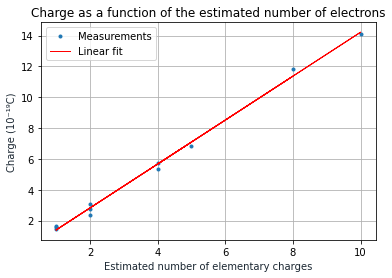

In [23]:
x = n_measured2
y = (c0+el*np.array(n_measured2))*1e19
#print(y)]
y2 = []
for i in range(len(charges_measured)):
    y2.append(charges_measured[i]*1e19)
plt.plot(x, y2, '.', label='Measurements')
plt.plot(x, y, 'r', label="Linear fit")
plt.title('Charge as a function of the estimated number of electrons')
plt.xlabel('Estimated number of elementary charges', color='#1C2833')
plt.ylabel('Charge (10⁻¹⁹C)', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()